# Pesticides Sales Forcasting for "ABC_MANUFACTURING" 

### Importing Library which are required

In [238]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
#matplotlib.rcParams['axes.labelsize'] = 14
#matplotlib.rcParams['xtick.labelsize'] = 12
#matplotlib.rcParams['ytick.labelsize'] = 12
#matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns


In [183]:
import warnings
warnings.filterwarnings('ignore')

### Setting up the working directory

In [3]:
os.chdir("C:\\Users\\DELL\\Desktop\\capstone")

In [4]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\capstone'

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'ABC_Manufacturing.csv',
 'Capstone_Pesticide_Sales_Forecasting-1.1.ipynb',
 'Capstone_Pesticide_Sales_Forecasting.ipynb',
 'Final_Capstone_Pesticide_Sales_Forecasting-Copy1.0.ipynb',
 'Final_Capstone_Pesticide_Sales_Forecasting.ipynb',
 'Final_Capstone_Pesticide_Sales_ForecastingMapeIssue.ipynb',
 'Final_Capstone_Pesticide_Sales_Forecasting_kishorfixes.ipynb',
 "Komal's Script.ipynb",
 'Sales_Forecast_Data.xlsx']

### Importing Time Series Data

In [6]:
sale_forecast_df=pd.read_excel("Sales_Forecast_Data.xlsx")

In [7]:
sale_forecast_df.head(5)

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


### Checking For Null Values

In [8]:
sale_forecast_df.isna().sum().sort_values()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

## There seems no null values in data.Now we will look into any zero value

In [9]:
##Getting indexces of rows where VALUE==0
index_number=sale_forecast_df[sale_forecast_df.VALUE==0].index;
index_number

Int64Index([     5,      6,      7,      8,      9,     10,     11,     12,
                13,     14,
            ...
            230138, 230140, 230142, 230143, 230144, 230145, 230146, 230147,
            230149, 230151],
           dtype='int64', length=145408)

## Dropping the rows which have Zero Values

In [10]:
sale_forecast_df.drop(index_number,inplace=True)

### Value counts for Pesticides type

In [11]:
sale_forecast_df['FG'].value_counts()

Insecticides    41628
Rodenticides    25092
Herbicides       9116
Bactericides     8908
Name: FG, dtype: int64

### Now we can see that each pesticides type have the different counts of unique values

### Value counts for Company

In [12]:
sale_forecast_df['COMPANY'].value_counts()

ABC Manufacturing    16660
cynoid               10719
disescent             7780
trita                 6638
interosis             4978
idiombee              4850
scire                 3738
hemify                3608
exicious              3248
venible               3232
unimm                 2984
zooloo                2889
unent                 2645
janu                  2414
socimbee              1986
flimbo                1302
monous                1222
kadoo                 1217
intravu                865
agizu                  675
archile                385
esose                  301
dominive               145
insulescent             82
centicee                60
oyofix                  55
maler                   23
subism                  15
domise                  15
avape                   13
Name: COMPANY, dtype: int64

### Creating new column DATE

As we observed that values in column 'FIN_YEAR' are like 2014-2015
that means it is in financial year starting with  01-04-2014 to 31-03-2015 
And MONTH is given like 'Jan','Feb','Mar' etc. so if eg: FIN_YEAR is 2014-2015 and 
if we combine any month eg:'JAN' with it then JAN 2014-2015 means JAN OF 2015
since financial starts with April and ends at March 
So now our aim is to create a new column DATE where we combine the 'MONTH' and 'FIN_YEAR' and
extract the correct year for  particular month 

In [13]:
sale_forecast_df['DATE']=np.where(sale_forecast_df['MONTH'].isin(['Jan','Feb','Mar']),sale_forecast_df['MONTH']+sale_forecast_df['FIN_YEAR'].str[5:], sale_forecast_df['MONTH']+sale_forecast_df['FIN_YEAR'].str[:4])


In [14]:
sale_forecast_df[['DATE','MONTH','FIN_YEAR']]

,DATE,MONTH,FIN_YEAR
0,Nov2014,Nov,2014-2015
1,Nov2014,Nov,2014-2015
2,Nov2014,Nov,2014-2015
3,Nov2014,Nov,2014-2015
4,Nov2014,Nov,2014-2015
...,...,...,...
230116,Mar2017,Mar,2016-2017
230139,Aug2016,Aug,2016-2017
230141,Aug2016,Aug,2016-2017
230148,Dec2016,Dec,2016-2017


# Data Preprocessing

## Preparing the data for ABC Manufacturing

In [15]:
ABC_df=sale_forecast_df[sale_forecast_df['COMPANY']=="ABC Manufacturing"]

In [16]:
ABC_df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,DATE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,Dec2014
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,Dec2014
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,Dec2014
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,Dec2014
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,Dec2014


In [17]:
ABC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16660 entries, 49 to 182822
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FIN_YEAR  16660 non-null  object 
 1   MONTH     16660 non-null  object 
 2   STATE     16660 non-null  object 
 3   FG        16660 non-null  object 
 4   DISTRICT  16660 non-null  object 
 5   COMPANY   16660 non-null  object 
 6   VALUE     16660 non-null  float64
 7   DATE      16660 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.1+ MB


In [18]:
#using the pd.to_datetime we convert the DATE which is of type object into datetime format 

ABC_df['DATE'] = pd.to_datetime(ABC_df['DATE'])

# Data Visualization

### Consumption of pesticides Statewise

Text(0.5, 1.0, 'Statewise consumption of pesticides')

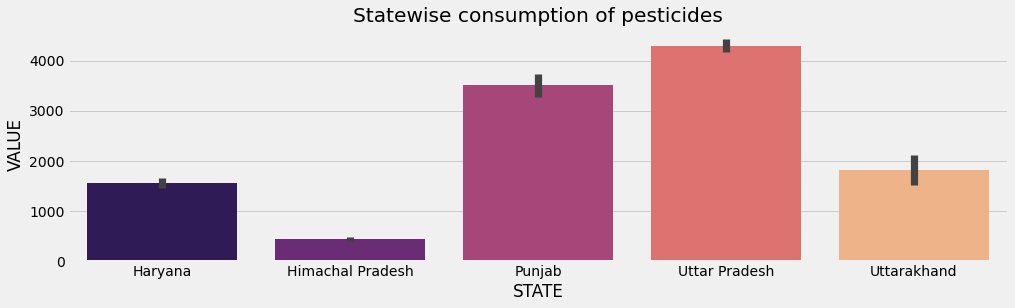

In [19]:
plt.figure(figsize=(15,4))
sns.barplot(x='STATE',y='VALUE',palette="magma",data= ABC_df)
plt.title("Statewise consumption of pesticides")

Uttarpradesh is the highest in consumption of the Pesticides. Punjab is the second in Pesticide consumption and Himachal Pradesh consumes least in all of these 5 Northern States.

### Consumption of the Different category of Pesticides statewise

<AxesSubplot:title={'center':'Value of each category of Pesticides in different States'}, xlabel='STATE', ylabel='VALUE'>

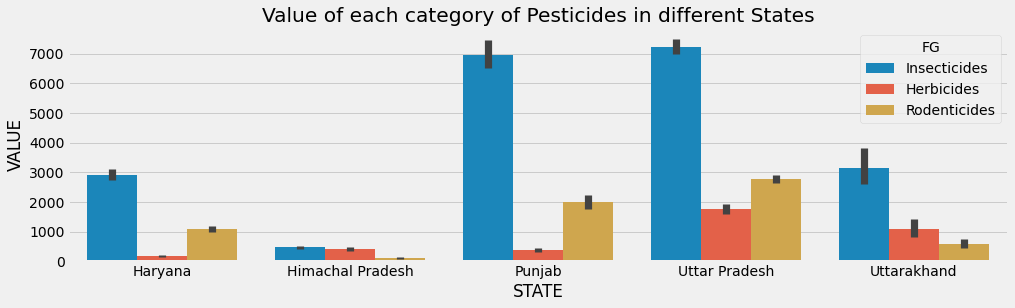

In [20]:
plt.figure(figsize=(15,4))
plt.title("Value of each category of Pesticides in different States")
sns.barplot(x='STATE',y='VALUE',hue='FG',data=ABC_df)
#sns.countplot(x='STATE',hue='FG',data=ABC_df)

From above graph we can see that Punjab and UP have highest consumption of Insecticides ,Haryana consumes least Herbicides and it seems Himachal Pradesh has no consumption of Rodenticides.

In [21]:
#sns.countplot(x='STATE', data = ABC_df, hue ='FG', palette='BuPu')

### Sales of different category of pesticides

Text(0.5, 1.0, 'Sales of different category of pesticides')

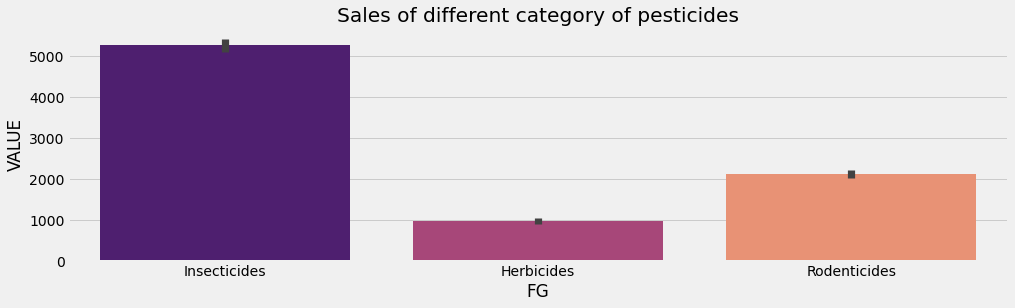

In [22]:
plt.figure(figsize=(15,4))
sns.barplot(x='FG', y= 'VALUE',data = ABC_df, palette= 'magma') 
plt.title("Sales of different category of pesticides")

We can see from above plot  that For ABC_Manufacturing Insecticides accounts for the highest portion of the Sales whereas Herbicides is the least .

## Insights drawn from Visualizing the data

1. UP is highest in cunsumption of pesticides.

2. Himachal Pradesh consumes less pesticides.

3. Insecticides is used most in all the states.



## Dropping unwanted columns

In [23]:
#Since we are forcasting and its time series data hence we retain the features which are required for the 
#forecasting.As we know for time series data is collected with respect to time or regluar interval of time and the 
#the values will be auto-correlated with past data
#So we consider DATE,VALUE for the forecasting and drop other features which are not required for forecasting

ABC_df=ABC_df.drop(['FIN_YEAR','MONTH','FG','DISTRICT','COMPANY'],axis=1)

In [24]:
ABC_df.head(5)

,STATE,VALUE,DATE
49,Haryana,6019.380,2014-12-01
50,Haryana,425.250,2014-12-01
51,Haryana,14782.635,2014-12-01
52,Haryana,4031.910,2014-12-01
53,Haryana,8692.110,2014-12-01


## Checking if the series is Stationary or not

##### We can check stationarity in different way we will do

1.By plot the graph

2.By using Augmneted Dickey Fuller Test

In [25]:
# since there are multiple entries for one date so we wiil club them together to make our Data in  regular time interval
df=ABC_df.groupby('DATE')['VALUE'].sum().reset_index()

df.shape

(46, 2)

In [26]:
df.head()

,DATE,VALUE
0,2014-04-01,397456.335
1,2014-05-01,671365.935
2,2014-06-01,912168.945
3,2014-07-01,975706.155
4,2014-08-01,1403217.810


In [27]:
#Now our data is Monthly basis
#Set the index

df.set_index('DATE', inplace=True)

In [28]:
df.head()

,VALUE
DATE,
2014-04-01,397456.335
2014-05-01,671365.935
2014-06-01,912168.945
2014-07-01,975706.155
2014-08-01,1403217.810


### Plotting the graph to check stationarity

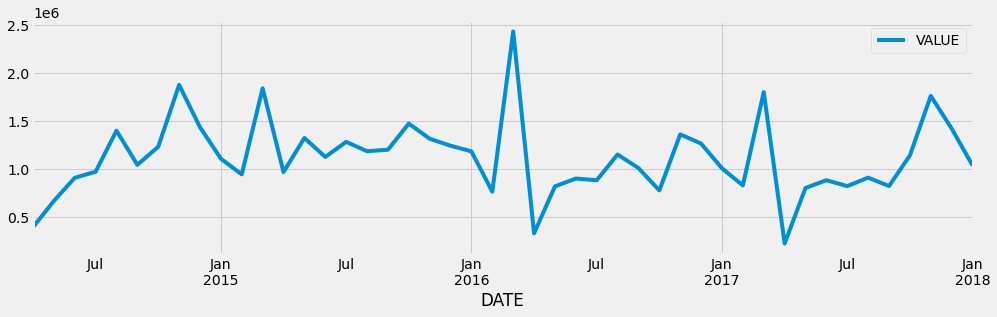

In [29]:
df.plot(figsize=(15, 4))
plt.show()

## Performing the Augmented Dickey Fuller test

Our first step in time-series analysis should be to check whether there is any evidence of a trend or seasonal effects and, if there is, remove them. Augmented Dickey-Fuller(ADF) statistics is one of the more widely used statistical test to check whether your time series is stationary or non-stationary. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

*Null Hypothesis=Time series is not stationary*

*Alternate Hypothesis =It is stationary*

In [30]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(df,autolag='AIC')

#dfoutput=pd.Series(result[0:4],index=[1,2,'Lag',4])

print('ADF Statistic: %f' % result[0])

print('p-value: %f' % result[1])

#print(result)

print('Critical Values:')

for key, value in result[4].items():
       print(key, value)
#print(dfoutput)       

ADF Statistic: -7.431211
p-value: 0.000000
Critical Values:
1% -3.584828853223594
5% -2.9282991495198907
10% -2.6023438271604937


### Here, the p-value is less than 0.05, so we reject null hypothesis and confirm that the series is stationary.

# *Conduct state wise Trend analysis of the given sales*

## Statewise Segmentation of data

In [31]:
HR=ABC_df[ABC_df['STATE']=='Haryana']

PNB=ABC_df[ABC_df['STATE']=='Punjab']

UP=ABC_df[ABC_df['STATE']=='Uttar Pradesh']

HP=ABC_df[ABC_df['STATE']=='Himachal Pradesh']

UK=ABC_df[ABC_df['STATE']=='Uttarakhand']

In [32]:
PNB.head()

,STATE,VALUE,DATE
2015,Punjab,1443.690,2015-03-01
2016,Punjab,3889.755,2015-03-01
2017,Punjab,1339.200,2015-03-01
2018,Punjab,526.500,2015-03-01
2019,Punjab,74.115,2015-03-01


### Aggregate statewise sales by DATE and finally set index 


In [33]:
HR=HR.groupby('DATE')['VALUE'].sum().reset_index()
HR.set_index('DATE',inplace=True)

PNB=PNB.groupby('DATE')['VALUE'].sum().reset_index()
PNB.set_index('DATE',inplace=True)

UP=UP.groupby('DATE')['VALUE'].sum().reset_index()
UP.set_index('DATE',inplace=True)

UK=UK.groupby('DATE')['VALUE'].sum().reset_index()
UK.set_index('DATE',inplace=True)

HP=HP.groupby('DATE')['VALUE'].sum().reset_index()
HP.set_index('DATE',inplace=True)

In [34]:
UP.head()

,VALUE
DATE,
2014-04-01,142695.000
2014-05-01,395083.710
2014-06-01,553862.070
2014-07-01,720928.080
2014-08-01,1103308.965


In [35]:
HP.head()

,VALUE
DATE,
2014-04-01,6969.780
2014-05-01,10023.480
2014-06-01,18159.390
2014-07-01,14409.630
2014-08-01,7495.875


## Visualizing the Pesticide sales statewise

In [36]:
#function to visually checking the time series for trend and other componenets 
def showplot(df,state):
    df.plot(figsize=(15, 4))
    plt.title("Sales Forecast of {}". format(state))
    plt.show()
    

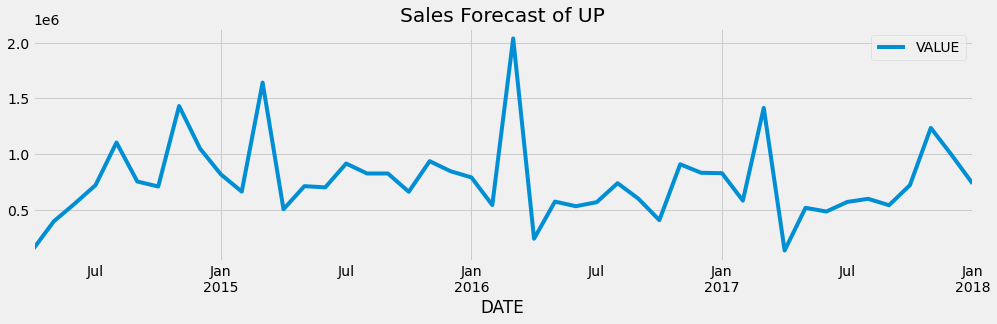

In [37]:
showplot(UP,"UP")

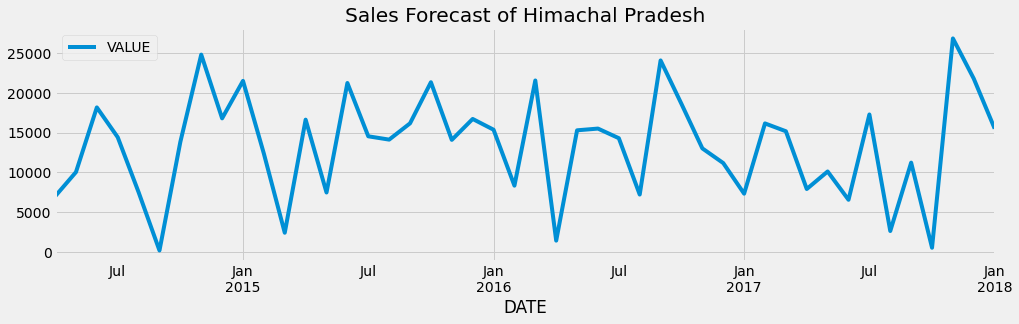

In [38]:
showplot(HP,"Himachal Pradesh")

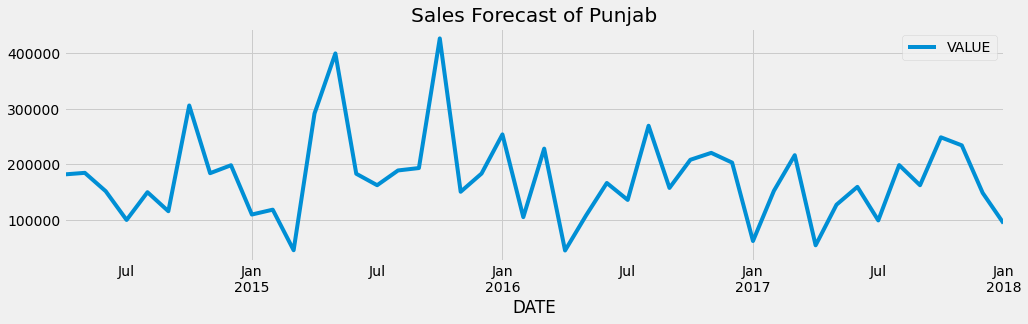

In [39]:
showplot(PNB,"Punjab")

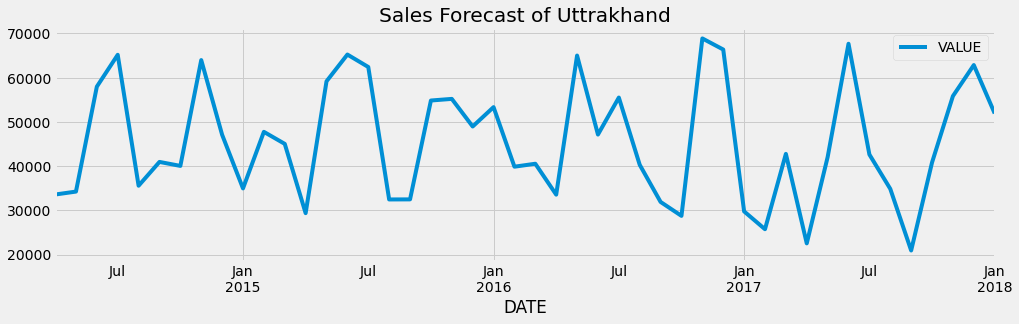

In [40]:
showplot(UK,"Uttrakhand")

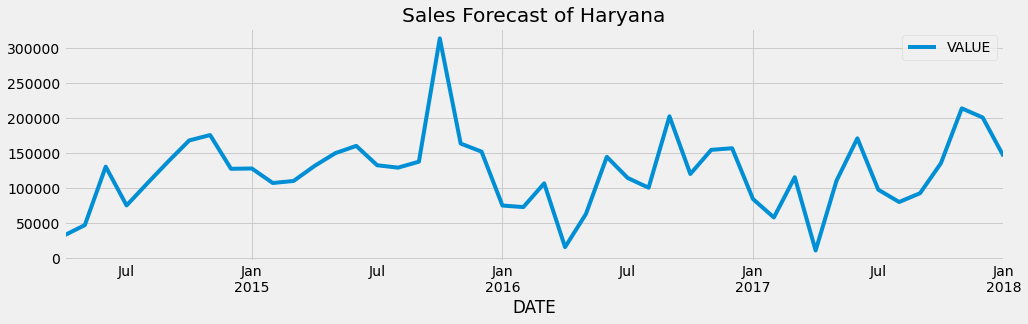

In [41]:
showplot(HR,"Haryana")

 ##### *With above graphs we we are not quite able to figure out the trend and seasonal af any state. Hence we do decomposing which helps us to gives the clear visualization of seasonl,trend and noise*

# Decomposing
Decomposing the time series into three distinct components: trend, seasonality, and noise.

In [42]:
#Defining the function for decomposing the time series into three distinct components: 
#trend, seasonality, and noise.

from statsmodels.tsa.seasonal import seasonal_decompose

def decomposeFunction(df):

    decomposition = seasonal_decompose(df)
    plt.plot(df, label = 'Original')
    plt.xticks(rotation='vertical')
    plt.legend(loc = 'best')

    trend = decomposition.trend
    plt.show()
    plt.xticks(rotation='vertical')
    plt.plot(trend, label = 'Trend')
    plt.legend(loc = 'best')
    trend

    seasonal = decomposition.seasonal
    plt.show()
    plt.xticks(rotation='vertical')
    plt.plot(seasonal, label = 'Seasonal')
    plt.legend(loc = 'best')

    residual = decomposition.resid
    plt.show()
    plt.xticks(rotation='vertical')
    plt.plot(residual, label = 'Residual')
    plt.legend(loc='best')
    
  

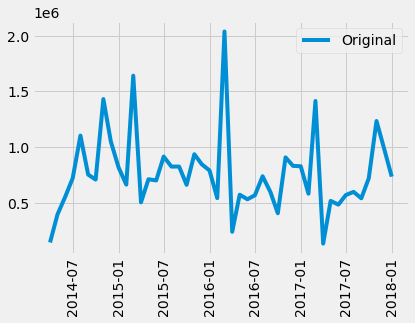

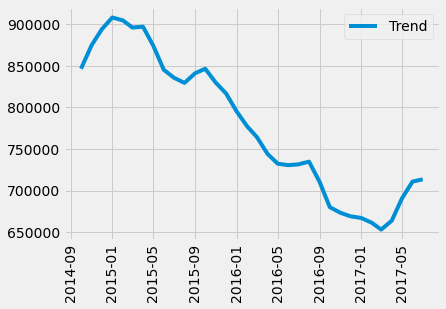

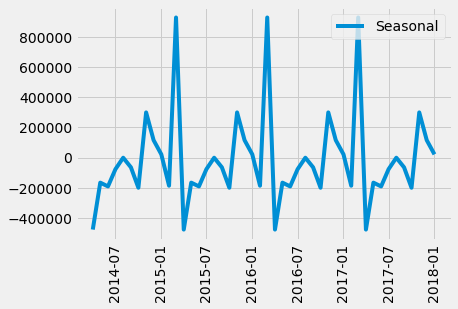

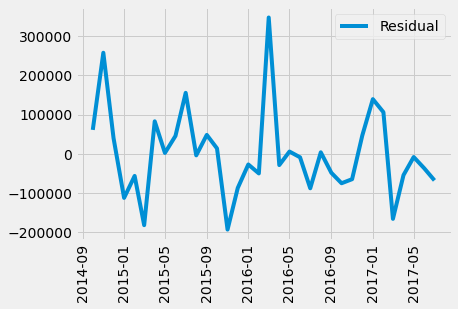

In [43]:
decomposeFunction(UP)

Since there is trend which is increasing and decreasing i,e fluctuating 
but  there is clearly Seasonality present which is additive i.e. its amplitude is not changing with respect to time.

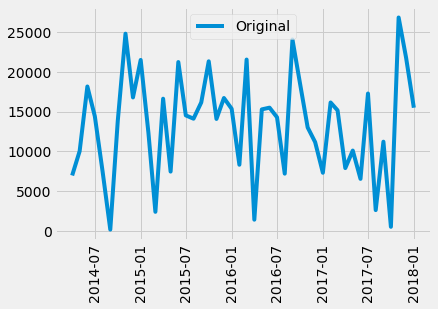

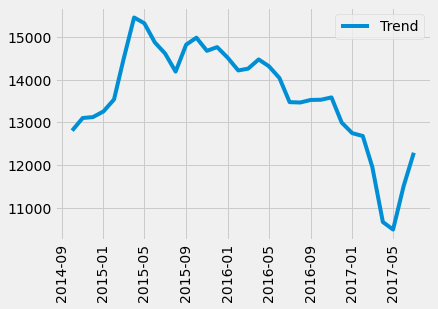

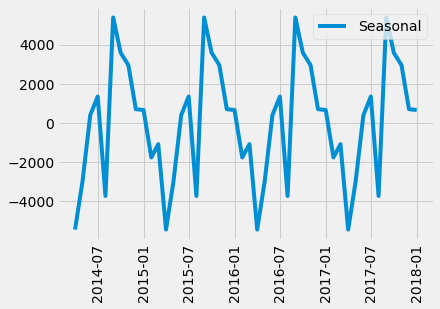

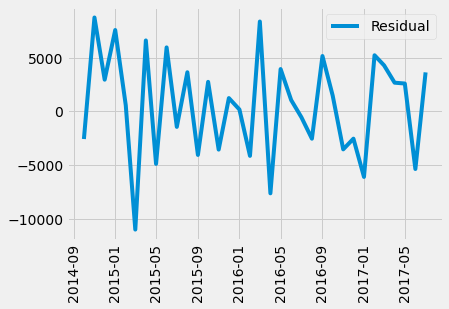

In [44]:
decomposeFunction(HP)

Since there is trend which is increasing and decreasing i,e fluctuating 
but  there is clearly Seasonality present which is additive i.e. its amplitude is not changing with respect to time.

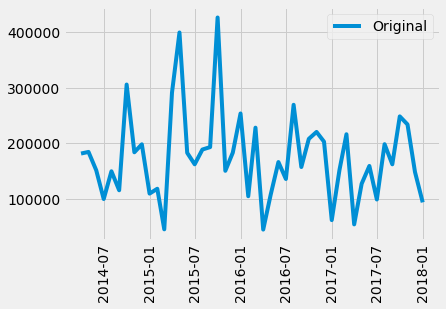

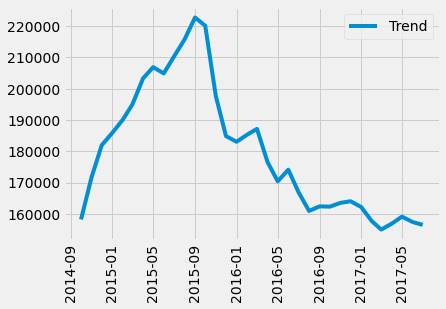

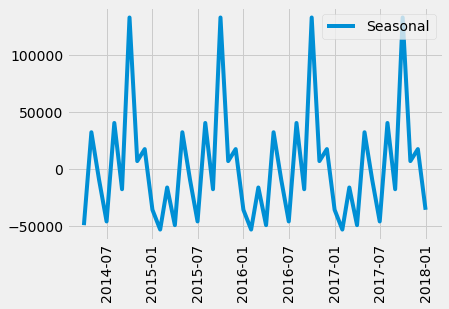

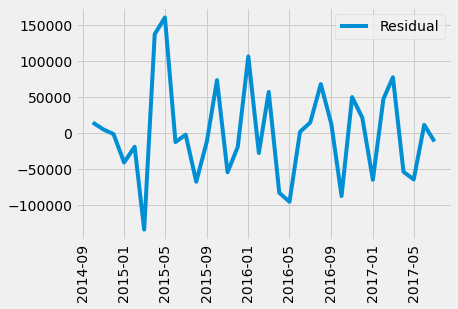

In [45]:
decomposeFunction(PNB)

Since there is trend which is increasing and decreasing i,e fluctuating 
but  there is clearly Seasonality present which is additive i.e. its amplitude is not changing with respect to time.

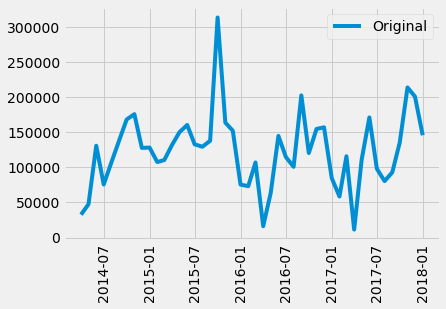

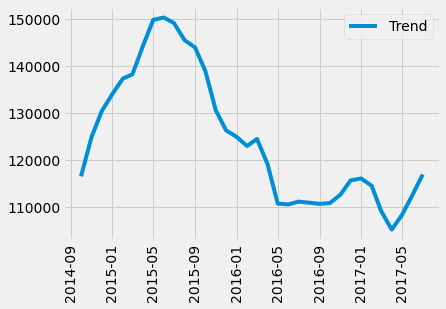

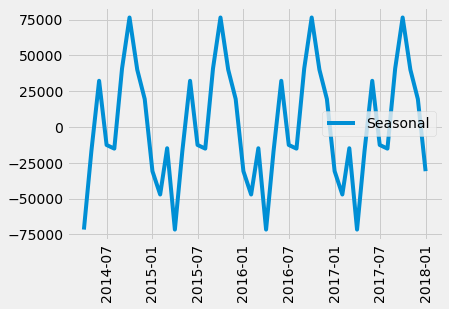

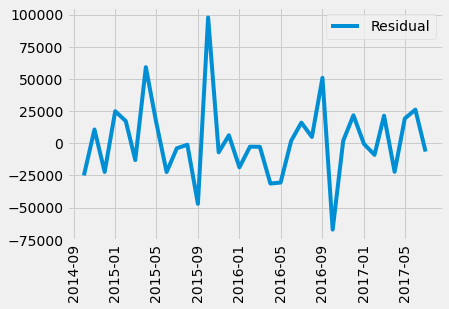

In [46]:
decomposeFunction(HR)

Since there is trend which is increasing and decreasing i,e fluctuating 
but  there is clearly Seasonality present which is additive i.e. its amplitude is not changing with respect to time.

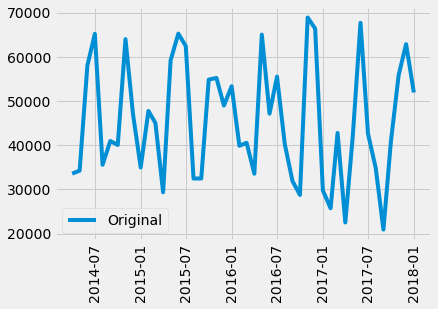

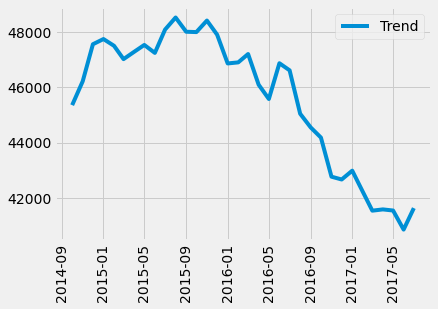

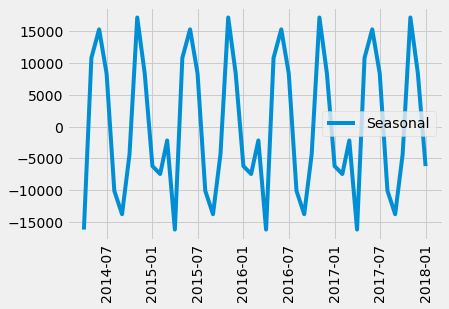

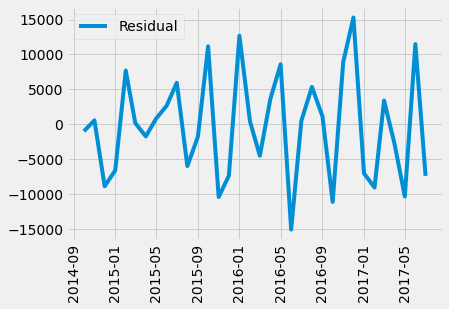

In [47]:
decomposeFunction(UK)

Since there is trend which is increasing and decreasing i,e fluctuating 
but  there is clearly Seasonality present which is additive i.e. its amplitude is not changing with respect to time.

# *State wise forecast of Pesticide sales for ABC Manufacturing*

## Model Building ##


###### we are going to Build follwing models

1.ARIMA
    
2.SARIMA


## ACF anf PACF ##

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [195]:
#function to create acf plot
    
def show_acf(df,state):
    plot_acf(df)
    plt.title("ACF plot of {}". format(state))
    plt.show()
    
    

In [196]:
#function to show pacf plot
def show_pacf(df,state):
    plot_pacf(df)
    plt.title("PACF plot of {}". format(state))
    plt.show()
    

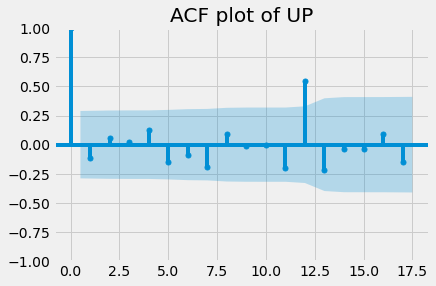

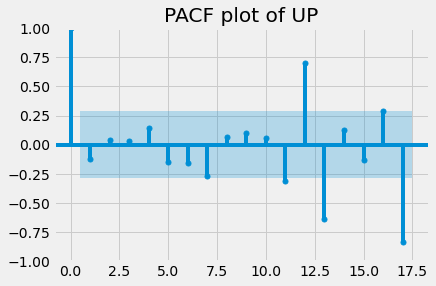

In [197]:
show_acf(UP,"UP")
show_pacf(UP,"UP")

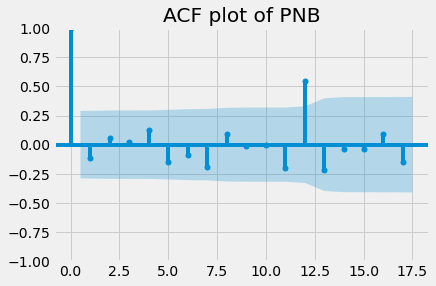

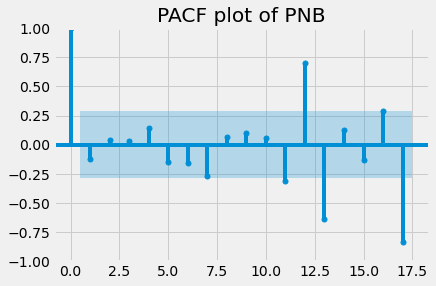

In [198]:
show_acf(UP,"PNB")
show_pacf(UP,"PNB")

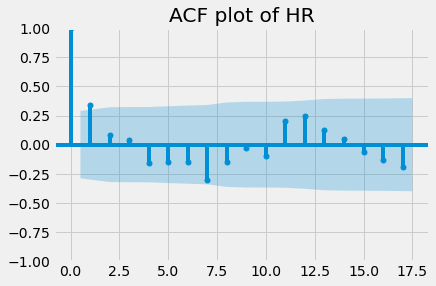

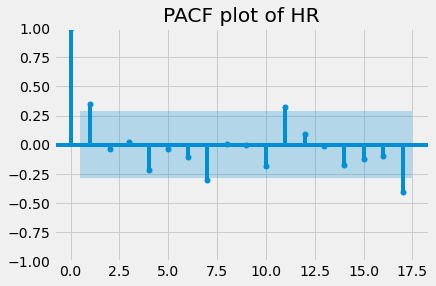

In [199]:
show_acf(HR,"HR")
show_pacf(HR,"HR")

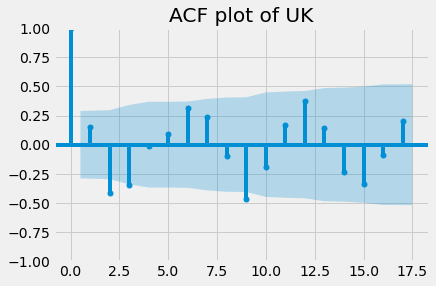

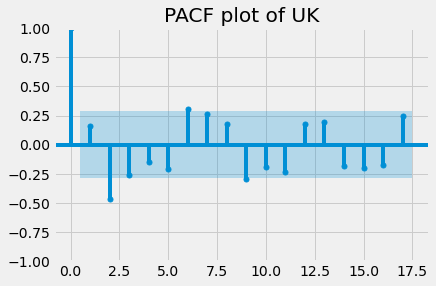

In [200]:
show_acf(UK,"UK")
show_pacf(UK,"UK")

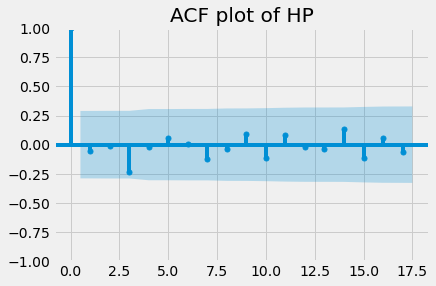

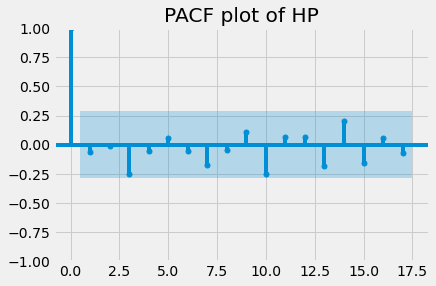

In [201]:
show_acf(HP,"HP")
show_pacf(HP,"HP")

# Spliting the dataset for Train and Test

In [202]:
#since there are 46 entries we using 70% in train and remianing on test i,e 30% we validate on test
train_UP=UP.iloc[0:32]
test_UP=UP.iloc[32:]

train_HR=HR.iloc[0:32]
test_HR=HR.iloc[32:]

train_PB=PNB.iloc[0:32]
test_PB=PNB.iloc[32:]

train_HP=HP.iloc[0:32]
test_HP=HP.iloc[32:]

train_UK=UK.iloc[0:32]
test_UK=UK.iloc[32:]

In [59]:
#train_UP

#  Auto Arima  Model #

## Building Auto Arima For Uttar Pradesh ##

In [60]:
#!pip install pmdarima

In [203]:
from pmdarima import auto_arima
from pmdarima.arima import ARIMA

In [204]:
autoarima_Model_UP=auto_arima(train_UP,trace=True,suppress_warnings=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=555.837, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=555.021, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=557.108, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=557.688, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=553.277, Time=0.05 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=555.039, Time=0.09 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=556.947, Time=0.30 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=552.155, Time=0.06 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=553.905, Time=0.11 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=553.900, Time=0.11 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=555.900, Time=0.18 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=553.207, Time=0.09 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=554.960, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   

###  Fitting Arima on the value of AR(p) d  MA(q) and Seasonalty AR(P) D MA(Q) from Auto Arima ###

In [205]:
AutoArima_UP=ARIMA((2,0,0),(0,1,0,12)).fit(train_UP)

AutoArima_UP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   32
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -272.077
Date:                            Thu, 16 Feb 2023   AIC                            552.155
Time:                                    01:03:46   BIC                            556.138
Sample:                                04-01-2014   HQIC                           552.932
                                     - 11-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -9.465e+04   4.74e+04     -1.995      0.046   -1.88e+05   -1676.062
ar.L1          0.1382      0.222      0.622      0.534      -0.297       0.573
ar.L2          0.2125      0.278      0.765      0.444      -0.332       0.757
sigma2      4.086e+10      0.032   1.28e+12      0.000    4.09e+10    4.09e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.24   Prob(JB):                         0.77
Heteroskedasticity (H):               0.60   Skew:                             0.17
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.71e+33. Standard errors may be unstable.
"""

## Make Predictions on Test Set ##


In [206]:
AutoForecast_UP=pd.Series(AutoArima_UP.predict(14)).rename('AutoForecast_UP')

Mape: 27.654261945303237
RMSE :272427.3230568019


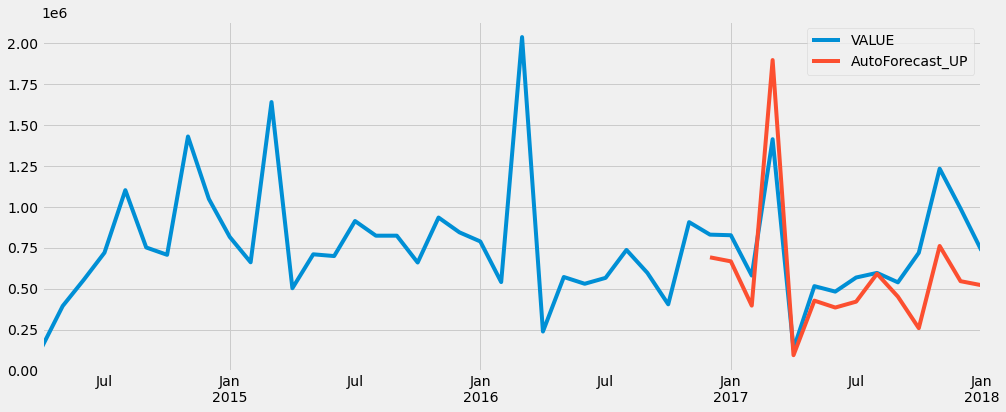

In [207]:
    #creating new dataframe to save Forecasted value and actual dataset value in together
    Auto_Forecast_Df_UP=pd.concat([UP,AutoForecast_UP],axis=1)

    #creating a new datframe for storing the last 14 records from Actual_Forecast_Df where our 
    #forecasted  value as well as observed value are present so that we can calculate the errors
    Validation_df_UP=Auto_Forecast_Df_UP[-14:].copy()

    #Calculating MAPE
    Auto_MAPE_UP=np.mean(abs(Validation_df_UP['VALUE']-Validation_df_UP['AutoForecast_UP'])/Validation_df_UP['VALUE'])*100

    #calculating RMSE
    Auto_RMSE_UP=np.sqrt(np.mean((Validation_df_UP['VALUE']-Validation_df_UP['AutoForecast_UP'])**2))
    
    print("Mape: {}".format(Auto_MAPE_UP))
    
    print("RMSE :{}".format(Auto_RMSE_UP))
    
    Auto_Forecast_Df_UP.plot(figsize=(15, 6));plt.show()

## Building Auto Arima For Haryana ##

In [208]:
autoarima_Model_HR=auto_arima(train_HR,trace=True,suppress_warnings=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=488.693, Time=0.30 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=496.503, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=481.400, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.828, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=484.129, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=482.421, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=482.536, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=481.957, Time=0.06 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=484.421, Time=0.28 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=482.781, Time=0.17 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=483.386, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.294, Time=0.08 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=485.036, Time=0.26 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

###  Fitting Arima on the value of AR(p) d  MA(q) and Seasonalty AR(P) D MA(Q) from Auto Arima ###

In [209]:
AutoArima_HR=ARIMA((1,1,0),(1,1,0,12)).fit(train_HR)

AutoArima_HR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   32
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -237.316
Date:                            Thu, 16 Feb 2023   AIC                            482.632
Time:                                    01:04:06   BIC                            486.409
Sample:                                04-01-2014   HQIC                           483.271
                                     - 11-01-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.876e+04   2.29e+04     -0.818      0.414   -6.37e+04    2.62e+04
ar.L1         -0.5625      0.444     -1.268      0.205      -1.432       0.307
ar.S.L12      -0.7976      0.466     -1.711      0.087      -1.711       0.116
sigma2      5.478e+09      0.103   5.31e+10      0.000    5.48e+09    5.48e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 5.36
Prob(Q):                              0.74   Prob(JB):                         0.07
Heteroskedasticity (H):               0.42   Skew:                             1.01
Prob(H) (two-sided):                  0.32   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.69e+29. Standard errors may be unstable.
"""

## Make Predictions on Test Set ##


In [210]:
AutoForecast_HR=pd.Series(AutoArima_HR.predict(14)).rename('AutoForecast_HR')

Mape: 94.3094076581337
RMSE :145562.1752519114


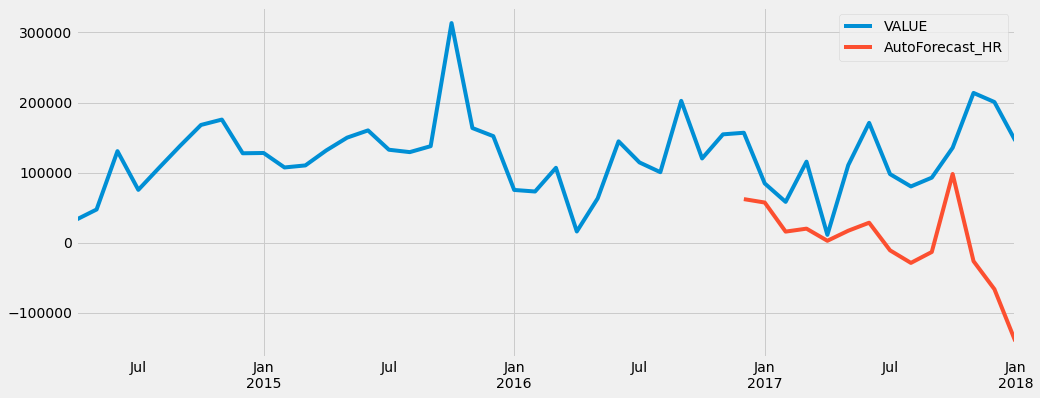

In [211]:
    #creating new dataframe to save Forecasted value and actual dataset value in together
    Auto_Forecast_Df_HR=pd.concat([HR,AutoForecast_HR],axis=1)

    #creating a new datframe for storing the last 14 records from Actual_Forecast_Df where our 
    #forecasted  value as well as observed value are present so that we can calculate the errors
    Validation_df_HR=Auto_Forecast_Df_HR[-14:].copy()

    #Calculating MAPE
    Auto_MAPE_HR=np.mean(abs(Validation_df_HR['VALUE']-Validation_df_HR['AutoForecast_HR'])/Validation_df_HR['VALUE'])*100

    #calculating RMSE
    Auto_RMSE_HR=np.sqrt(np.mean((Validation_df_HR['VALUE']-Validation_df_HR['AutoForecast_HR'])**2))
    
    print("Mape: {}".format(Auto_MAPE_HR))
    
    print("RMSE :{}".format(Auto_RMSE_HR))
    
    Auto_Forecast_Df_HR.plot(figsize=(15, 6));plt.show()

## Building Auto Arima For Punjab ##

In [212]:
autoarima_Model_PNB=auto_arima(train_PB,trace=True,suppress_warnings=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=830.294, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=820.714, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=824.707, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=824.811, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=875.032, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=822.714, Time=0.04 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=822.712, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=824.712, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=822.707, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=822.812, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=824.776, Time=0.05 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.981 seconds


###  Fitting Arima on the value of AR(p) d  MA(q) and Seasonalty AR(P) D MA(Q) from Auto Arima ###

In [213]:
AutoArima_PNB=ARIMA((0,0,0),(0,0,0,12)).fit(train_PB)

AutoArima_PNB.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:                        SARIMAX   Log Likelihood                -408.357
Date:                Thu, 16 Feb 2023   AIC                            820.714
Time:                        01:04:34   BIC                            823.645
Sample:                    04-01-2014   HQIC                           821.686
                         - 11-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.849e+05    1.8e+04     10.250      0.000     1.5e+05     2.2e+05
sigma2      7.108e+09   1.68e+09      4.233      0.000    3.82e+09    1.04e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.76
Prob(Q):                              0.87   Prob(JB):                         0.02
Heteroskedasticity (H):               1.30   Skew:                             1.02
Prob(H) (two-sided):                  0.67   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Make Predictions on Test Set ##


In [214]:
AutoForecast_PNB=pd.Series(AutoArima_PNB.predict(14)).rename('AutoForecast_PNB')

Mape: 58.813647578062934
RMSE :66994.11887840598


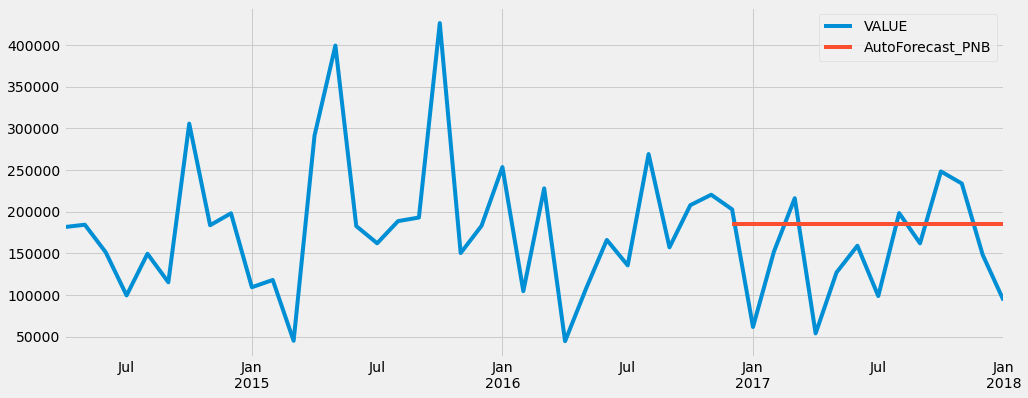

In [215]:
    #creating new dataframe to save Forecasted value and actual dataset value in together
    Auto_Forecast_Df_PNB=pd.concat([PNB,AutoForecast_PNB],axis=1)

    #creating a new datframe for storing the last 14 records from Actual_Forecast_Df where our 
    #forecasted  value as well as observed value are present so that we can calculate the errors
    Validation_df_PNB=Auto_Forecast_Df_PNB[-14:].copy()

    #Calculating MAPE
    Auto_MAPE_PNB=np.mean(abs(Validation_df_PNB['VALUE']-Validation_df_PNB['AutoForecast_PNB'])/Validation_df_PNB['VALUE'])*100

    #calculating RMSE
    Auto_RMSE_PNB=np.sqrt(np.mean((Validation_df_PNB['VALUE']-Validation_df_PNB['AutoForecast_PNB'])**2))
    
    print("Mape: {}".format(Auto_MAPE_PNB))
    
    print("RMSE :{}".format(Auto_RMSE_PNB))
    
    Auto_Forecast_Df_PNB.plot(figsize=(15, 6));plt.show()

## Building Auto Arima For Himachal Pradesh ##

In [216]:
autoarima_Model_HP=auto_arima(train_HP,trace=True,suppress_warnings=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=653.563, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=657.351, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=657.406, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=709.240, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=655.560, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=655.527, Time=0.03 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=657.527, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=655.356, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=655.406, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=657.455, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 0.920 seconds


###  Fitting Arima on the value of AR(p) d  MA(q) and Seasonalty AR(P) D MA(Q) from Auto Arima ###

In [217]:
AutoArima_HP=ARIMA((0,0,0),(0,0,0,12)).fit(train_HP)

AutoArima_HP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   32
Model:                        SARIMAX   Log Likelihood                -324.781
Date:                Thu, 16 Feb 2023   AIC                            653.563
Time:                        01:05:21   BIC                            656.494
Sample:                    04-01-2014   HQIC                           654.535
                         - 11-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.393e+04   1159.950     12.006      0.000    1.17e+04    1.62e+04
sigma2       3.83e+07   1.11e+07      3.446      0.001    1.65e+07    6.01e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 1.13
Prob(Q):                              0.63   Prob(JB):                         0.57
Heteroskedasticity (H):               0.85   Skew:                            -0.43
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Make Predictions on Test Set ##


In [218]:
AutoForecast_HP=pd.Series(AutoArima_HP.predict(14)).rename('AutoForecast_HP')

Mape: 253.69818459493993
RMSE :7173.573683656768


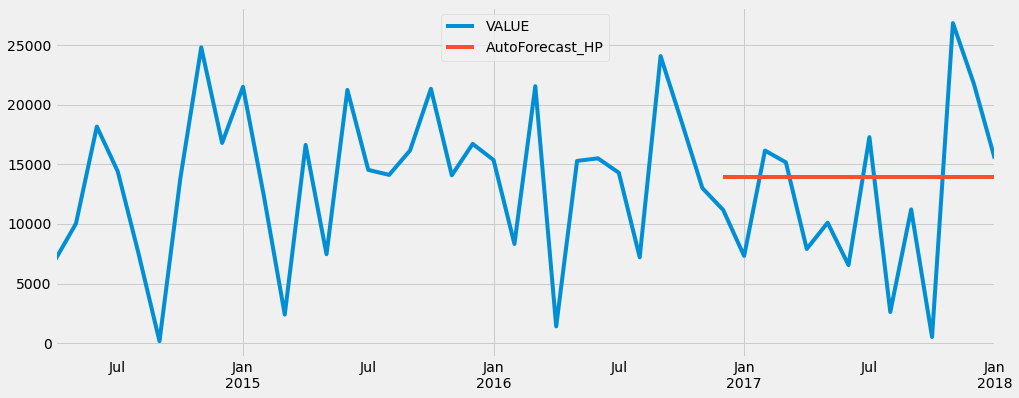

In [219]:
    #creating new dataframe to save Forecasted value and actual dataset value in together
    Auto_Forecast_Df_HP=pd.concat([HP,AutoForecast_HP],axis=1)

    #creating a new datframe for storing the last 14 records from Actual_Forecast_Df where our 
    #forecasted  value as well as observed value are present so that we can calculate the errors
    Validation_df_HP=Auto_Forecast_Df_HP[-14:].copy()

    #Calculating MAPE
    Auto_MAPE_HP=np.mean(abs(Validation_df_HP['VALUE']-Validation_df_HP['AutoForecast_HP'])/Validation_df_HP['VALUE'])*100

    #calculating RMSE
    Auto_RMSE_HP=np.sqrt(np.mean((Validation_df_HP['VALUE']-Validation_df_HP['AutoForecast_HP'])**2))
    
    print("Mape: {}".format(Auto_MAPE_HP))
    
    print("RMSE :{}".format(Auto_RMSE_HP))
    
    Auto_Forecast_Df_HP.plot(figsize=(15, 6));plt.show()

## Building Auto Arima For Uttrakhand ##

In [220]:
autoarima_Model_UK=auto_arima(train_UK,trace=True,suppress_warnings=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=436.278, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=439.075, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=439.454, Time=0.11 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=434.548, Time=0.04 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=438.277, Time=0.08 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=438.277, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=437.213, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=438.613, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=440.214, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 1.770 seconds


###  Fitting Arima on the value of AR(p) d  MA(q) and Seasonalty AR(P) D MA(Q) from Auto Arima ###

In [221]:
AutoArima_UK=ARIMA((0,0,0),(0,1,0,12)).fit(train_UK)

AutoArima_UK.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                   32
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                -216.139
Date:                  Thu, 16 Feb 2023   AIC                            436.278
Time:                          01:05:40   BIC                            438.269
Sample:                      04-01-2014   HQIC                           436.667
                           - 11-01-2016                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    369.8460   2670.987      0.138      0.890   -4865.193    5604.885
sigma2      1.427e+08   4.64e+07      3.077      0.002    5.18e+07    2.34e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.13   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.29   Prob(JB):                         0.99
Heteroskedasticity (H):               1.39   Skew:                            -0.02
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Make Predictions on Test Set ##


In [222]:
AutoForecast_UK=pd.Series(AutoArima_UK.predict(14)).rename('AutoForecast_UK')

Mape: 34.455282268149205
RMSE :14614.590925590674


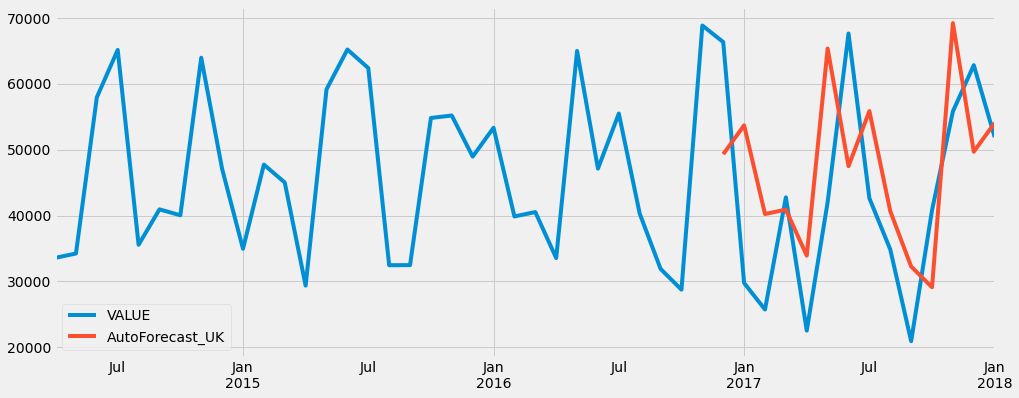

In [223]:
    #creating new dataframe to save Forecasted value and actual dataset value in together
    Auto_Forecast_Df_UK=pd.concat([UK,AutoForecast_UK],axis=1)

    #creating a new datframe for storing the last 14 records from Actual_Forecast_Df where our 
    #forecasted  value as well as observed value are present so that we can calculate the errors
    Validation_df_UK=Auto_Forecast_Df_UK[-14:].copy()

    #Calculating MAPE
    Auto_MAPE_UK=np.mean(abs(Validation_df_UK['VALUE']-Validation_df_UK['AutoForecast_UK'])/Validation_df_UK['VALUE'])*100

    #calculating RMSE
    Auto_RMSE_UK=np.sqrt(np.mean((Validation_df_UK['VALUE']-Validation_df_UK['AutoForecast_UK'])**2))
    
    print("Mape: {}".format(Auto_MAPE_UK))
    
    print("RMSE :{}".format(Auto_RMSE_UK))
    
    Auto_Forecast_Df_UK.plot(figsize=(15, 6));plt.show()

##### Auto Arima does not perform well so now building Sarima model #####

# Building Sarima Model #

## Sarima model for UP ##

### Performing Grid search ###

In [224]:
p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)

pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

#for storing the MAPE values of the different model
mapeList=[]

In [225]:
import warnings
warnings.filterwarnings('ignore')

In [226]:
def perform_gridSearch(original_df,train_df):
    for i in p:
        for j in d:
            for k in q:
                for l in P:
                    for m in D:
                        for n in Q:
                        
                            print(i,j,k,l,m,n)
                        
                            temparima_model=ARIMA((i,j,k),(l,m,n,12)).fit(train_df)
                        
                            Forecast=pd.Series(temparima_model.predict(14)).rename('Forecast')
                            #Forecast.index=test_UP.index
                            Actual_Forecast_Df=pd.concat([original_df,Forecast],axis=1)
                            Validation_df=Actual_Forecast_Df[-14:].copy()
                            tempMAPE=np.mean(abs(Validation_df['VALUE']-Validation_df['Forecast'])/Validation_df['VALUE'])*100
                        
                            pList.append(i)
                            dList.append(j)
                            qList.append(k)
                            PList.append(l)
                            DList.append(m)
                            QList.append(n)
                            mapeList.append(tempMAPE)

In [146]:
perform_gridSearch(UP,train_UP)

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 0 2
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 0 2
0 0 0 2 0 0
0 0 0 2 0 1
0 0 0 2 0 2
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 0 2
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 0 2
0 0 1 2 0 0
0 0 1 2 0 1
0 0 1 2 0 2
0 0 2 0 0 0
0 0 2 0 0 1
0 0 2 0 0 2
0 0 2 1 0 0
0 0 2 1 0 1
0 0 2 1 0 2
0 0 2 2 0 0
0 0 2 2 0 1
0 0 2 2 0 2
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 0 2
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 0 2
1 0 0 2 0 0
1 0 0 2 0 1
1 0 0 2 0 2
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 0 2
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 0 2
1 0 1 2 0 0
1 0 1 2 0 1
1 0 1 2 0 2
1 0 2 0 0 0
1 0 2 0 0 1
1 0 2 0 0 2
1 0 2 1 0 0
1 0 2 1 0 1
1 0 2 1 0 2
1 0 2 2 0 0
1 0 2 2 0 1
1 0 2 2 0 2
2 0 0 0 0 0
2 0 0 0 0 1
2 0 0 0 0 2
2 0 0 1 0 0
2 0 0 1 0 1
2 0 0 1 0 2
2 0 0 2 0 0
2 0 0 2 0 1
2 0 0 2 0 2
2 0 1 0 0 0
2 0 1 0 0 1
2 0 1 0 0 2
2 0 1 1 0 0
2 0 1 1 0 1
2 0 1 1 0 2
2 0 1 2 0 0
2 0 1 2 0 1
2 0 1 2 0 2
2 0 2 0 0 0
2 0 2 0 0 1
2 0 2 0 0 2
2 0 2 1 0 0
2 0 2 1 0 1
2 0 2 1 0 2
2 0 2 2 0 0
2 0 2 2 0 1
2 0 2 2 0 2


In [147]:
#creating dataframe to store all the possible combination  of p,d,q,P,D,Q and mapevalue
model_selection=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [148]:
#takingn out the min mape value
model_selection['MAPE'].min()

33.33034316132339

In [149]:
model_selection[model_selection['MAPE']==33.33034316132339]

,p,d,q,P,D,Q,MAPE
53,1,0,2,2,0,2,33.330343


Now we got better Mape than auto arima so  we will forecast for future  value using Sarima

<AxesSubplot:>

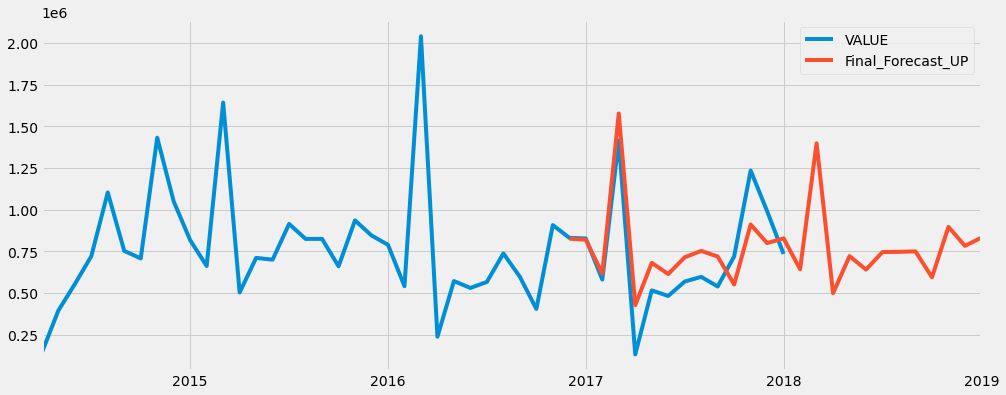

In [150]:
Final_model_UP=ARIMA((1,0,2),(2,0,2,12)).fit(train_UP)
Final_Forecast_UP=pd.Series(Final_model_UP.predict(26)).rename('Final_Forecast_UP')
Final_Forecast_UP_DF=pd.concat([UP,Final_Forecast_UP],axis=1)
Final_Forecast_UP_DF.plot(figsize=(15,6))

## Sarima model for Haryana ##

### Performing Grid search ###

In [227]:
p,d,q,P,D,Q=[6,7],range(1),range(4,6),[7,8],range(1),range(4,6)
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

#for storing the MAPE values of the different model
mapeList=[]


In [228]:
perform_gridSearch(HR,train_HR)

6 0 4 6 0 4
6 0 4 6 0 5
6 0 4 7 0 4
6 0 4 7 0 5
6 0 4 8 0 4
6 0 4 8 0 5
6 0 5 6 0 4
6 0 5 6 0 5
6 0 5 7 0 4
6 0 5 7 0 5
6 0 5 8 0 4
6 0 5 8 0 5
7 0 4 6 0 4
7 0 4 6 0 5
7 0 4 7 0 4
7 0 4 7 0 5
7 0 4 8 0 4
7 0 4 8 0 5
7 0 5 6 0 4
7 0 5 6 0 5
7 0 5 7 0 4
7 0 5 7 0 5
7 0 5 8 0 4
7 0 5 8 0 5
8 0 4 6 0 4
8 0 4 6 0 5
8 0 4 7 0 4
8 0 4 7 0 5
8 0 4 8 0 4
8 0 4 8 0 5
8 0 5 6 0 4
8 0 5 6 0 5
8 0 5 7 0 4
8 0 5 7 0 5
8 0 5 8 0 4
8 0 5 8 0 5


In [229]:
#creating dataframe to store all the possible combination  of p,d,q,P,D,Q and mapevalue
model_selection=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [230]:
model_selection['MAPE'].min()

60.642863109787704

In [231]:
model_selection[model_selection['MAPE']==60.642863109787704]

,p,d,q,P,D,Q,MAPE
23,7,0,5,8,0,5,60.642863


Now we got better Mape than auto arima so now we will forecast for future  value using Sarima

<AxesSubplot:>

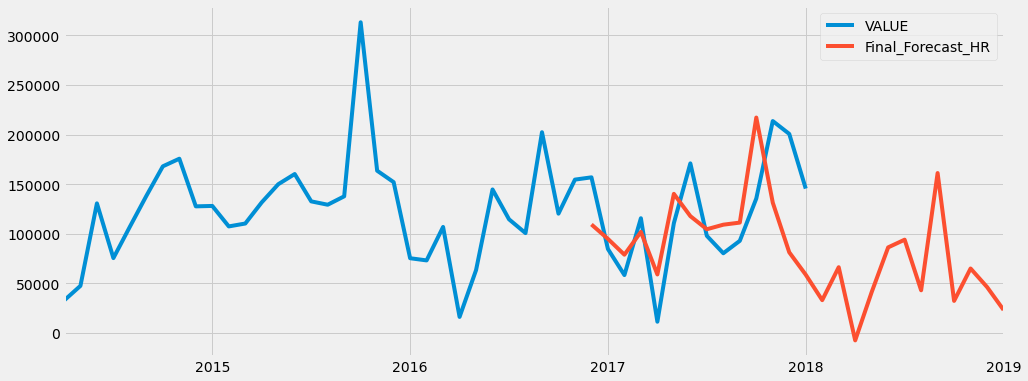

In [232]:
Final_model_HR=ARIMA((7,0,5),(8,0,5,12)).fit(train_HR)
Final_Forecast_HR=pd.Series(Final_model_HR.predict(26)).rename('Final_Forecast_HR')
Final_Forecast_HR_DF=pd.concat([HR,Final_Forecast_HR],axis=1)
Final_Forecast_HR_DF.plot(figsize=(15,6))

## Sarima model for Punjab ##

### Performing Grid search ###

In [233]:
#p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)
p,d,q,P,D,Q=[6,7],range(1),range(4,6),[7,8],range(1),range(4,6)
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

#for storing the MAPE values of the different model
mapeList=[]


In [234]:
perform_gridSearch(PNB,train_PB)

6 0 4 7 0 4
6 0 4 7 0 5
6 0 4 8 0 4
6 0 4 8 0 5
6 0 5 7 0 4
6 0 5 7 0 5
6 0 5 8 0 4
6 0 5 8 0 5
7 0 4 7 0 4
7 0 4 7 0 5
7 0 4 8 0 4
7 0 4 8 0 5
7 0 5 7 0 4
7 0 5 7 0 5
7 0 5 8 0 4
7 0 5 8 0 5


In [235]:
#creating dataframe to store all the possible combination  of p,d,q,P,D,Q and mapevalue
model_selection=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})

In [236]:
model_selection['MAPE'].min()

69.81630770275048

In [237]:
model_selection[model_selection['MAPE']==69.81630770275048]

,p,d,q,P,D,Q,MAPE
1,6,0,4,7,0,5,69.816308


Now we got better Mape than auto arima so now we will forecast for future  value using Sarima

<AxesSubplot:>

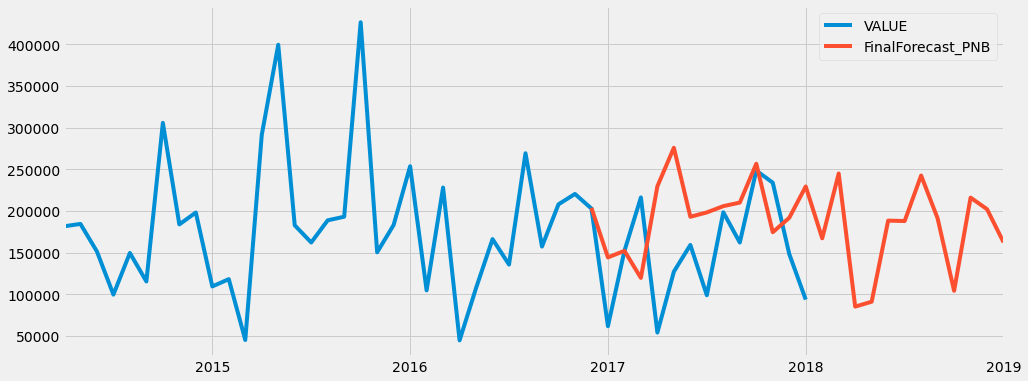

In [167]:
Final_model_PNB=ARIMA((6,0,4),(7,0,5,12)).fit(train_PB)
Final_Forecast_PNB=pd.Series(Final_model_PNB.predict(26)).rename('FinalForecast_PNB')
Final_Forecast_PNB_DF=pd.concat([PNB,Final_Forecast_PNB],axis=1)
Final_Forecast_PNB_DF.plot(figsize=(15,6))

## Sarima model for Himachal Pradesh ##

### Performing Grid search ###

In [168]:
p,d,q,P,D,Q=[4,5,6],range(1),range(4,6),range(3),range(1),[4,5,6]
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

#for storing the MAPE values of the different model
mapeList=[]


In [169]:
perform_gridSearch(HP,train_HP)

4 0 4 0 0 4
4 0 4 0 0 5
4 0 4 0 0 6
4 0 4 1 0 4
4 0 4 1 0 5
4 0 4 1 0 6
4 0 4 2 0 4
4 0 4 2 0 5
4 0 4 2 0 6
4 0 5 0 0 4
4 0 5 0 0 5
4 0 5 0 0 6
4 0 5 1 0 4
4 0 5 1 0 5
4 0 5 1 0 6
4 0 5 2 0 4
4 0 5 2 0 5
4 0 5 2 0 6
5 0 4 0 0 4
5 0 4 0 0 5
5 0 4 0 0 6
5 0 4 1 0 4
5 0 4 1 0 5
5 0 4 1 0 6
5 0 4 2 0 4
5 0 4 2 0 5
5 0 4 2 0 6
5 0 5 0 0 4
5 0 5 0 0 5
5 0 5 0 0 6
5 0 5 1 0 4
5 0 5 1 0 5
5 0 5 1 0 6
5 0 5 2 0 4
5 0 5 2 0 5
5 0 5 2 0 6
6 0 4 0 0 4
6 0 4 0 0 5
6 0 4 0 0 6
6 0 4 1 0 4
6 0 4 1 0 5
6 0 4 1 0 6
6 0 4 2 0 4
6 0 4 2 0 5
6 0 4 2 0 6
6 0 5 0 0 4
6 0 5 0 0 5
6 0 5 0 0 6
6 0 5 1 0 4
6 0 5 1 0 5
6 0 5 1 0 6
6 0 5 2 0 4
6 0 5 2 0 5
6 0 5 2 0 6


In [170]:
#creating dataframe to store all the possible combination  of p,d,q,P,D,Q and mapevalue
model_selection=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})


In [171]:
model_selection['MAPE'].min()

96.68651055692919

In [172]:
model_selection[model_selection['MAPE']==96.68651055692919]

,p,d,q,P,D,Q,MAPE
53,6,0,5,2,0,6,96.686511


As we can see Sarima is giving better Mape for all states as seasonality is present so now we forecast future value with sarima only 

<AxesSubplot:>

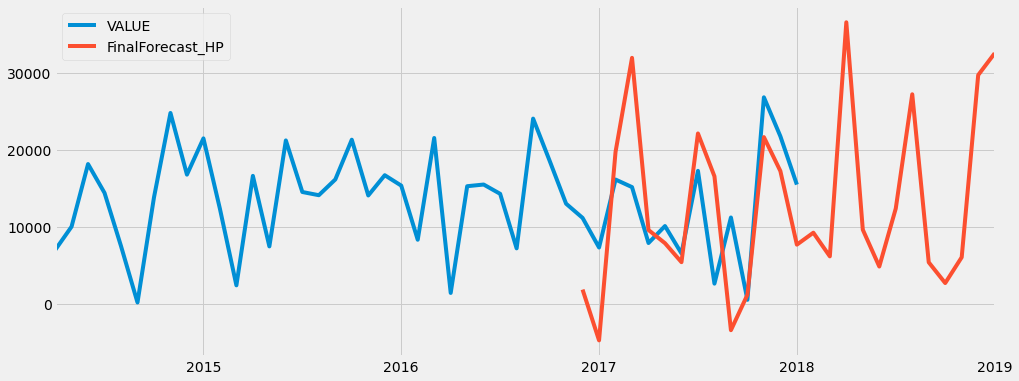

In [173]:
Final_model_HP=ARIMA((6,0,5),(2,0,6,12)).fit(train_HP)
Final_Forecast_HP=pd.Series(Final_model_HP.predict(26)).rename('FinalForecast_HP')
Final_Forecast_HP_DF=pd.concat([HP,Final_Forecast_HP],axis=1)
Final_Forecast_HP_DF.plot(figsize=(15,6))

## Sarima model for Uttrakhand ##

### Performing Grid search ###

In [174]:
p,d,q,P,D,Q=range(3),range(1),range(3),range(3),range(1),range(3)
#p,d,q,P,D,Q=[4,5,6],range(1),range(4,6),range(3),range(1),[4,5,6]
pList,dList,qList,PList,DList,QList=[],[],[],[],[],[]

#for storing the MAPE values of the different model
mapeList=[]


In [175]:
perform_gridSearch(UK,train_UK)

0 0 0 0 0 0
0 0 0 0 0 1
0 0 0 0 0 2
0 0 0 1 0 0
0 0 0 1 0 1
0 0 0 1 0 2
0 0 0 2 0 0
0 0 0 2 0 1
0 0 0 2 0 2
0 0 1 0 0 0
0 0 1 0 0 1
0 0 1 0 0 2
0 0 1 1 0 0
0 0 1 1 0 1
0 0 1 1 0 2
0 0 1 2 0 0
0 0 1 2 0 1
0 0 1 2 0 2
0 0 2 0 0 0
0 0 2 0 0 1
0 0 2 0 0 2
0 0 2 1 0 0
0 0 2 1 0 1
0 0 2 1 0 2
0 0 2 2 0 0
0 0 2 2 0 1
0 0 2 2 0 2
1 0 0 0 0 0
1 0 0 0 0 1
1 0 0 0 0 2
1 0 0 1 0 0
1 0 0 1 0 1
1 0 0 1 0 2
1 0 0 2 0 0
1 0 0 2 0 1
1 0 0 2 0 2
1 0 1 0 0 0
1 0 1 0 0 1
1 0 1 0 0 2
1 0 1 1 0 0
1 0 1 1 0 1
1 0 1 1 0 2
1 0 1 2 0 0
1 0 1 2 0 1
1 0 1 2 0 2
1 0 2 0 0 0
1 0 2 0 0 1
1 0 2 0 0 2
1 0 2 1 0 0
1 0 2 1 0 1
1 0 2 1 0 2
1 0 2 2 0 0
1 0 2 2 0 1
1 0 2 2 0 2
2 0 0 0 0 0
2 0 0 0 0 1
2 0 0 0 0 2
2 0 0 1 0 0
2 0 0 1 0 1
2 0 0 1 0 2
2 0 0 2 0 0
2 0 0 2 0 1
2 0 0 2 0 2
2 0 1 0 0 0
2 0 1 0 0 1
2 0 1 0 0 2
2 0 1 1 0 0
2 0 1 1 0 1
2 0 1 1 0 2
2 0 1 2 0 0
2 0 1 2 0 1
2 0 1 2 0 2
2 0 2 0 0 0
2 0 2 0 0 1
2 0 2 0 0 2
2 0 2 1 0 0
2 0 2 1 0 1
2 0 2 1 0 2
2 0 2 2 0 0
2 0 2 2 0 1
2 0 2 2 0 2


In [176]:
#creating dataframe to store all the possible combination  of p,d,q,P,D,Q and mapevalue
model_selection=pd.DataFrame({"p":pList,"d":dList,"q":qList,
                            "P":PList,"D":DList,"Q":QList,"MAPE":mapeList})


In [177]:
model_selection['MAPE'].min()

30.56820157644693

In [178]:
model_selection[model_selection['MAPE']==30.56820157644693]

,p,d,q,P,D,Q,MAPE
65,2,0,1,0,0,2,30.568202


Now we got better Mape than auto arima so now we will forecast for future  value using Sarima

<AxesSubplot:>

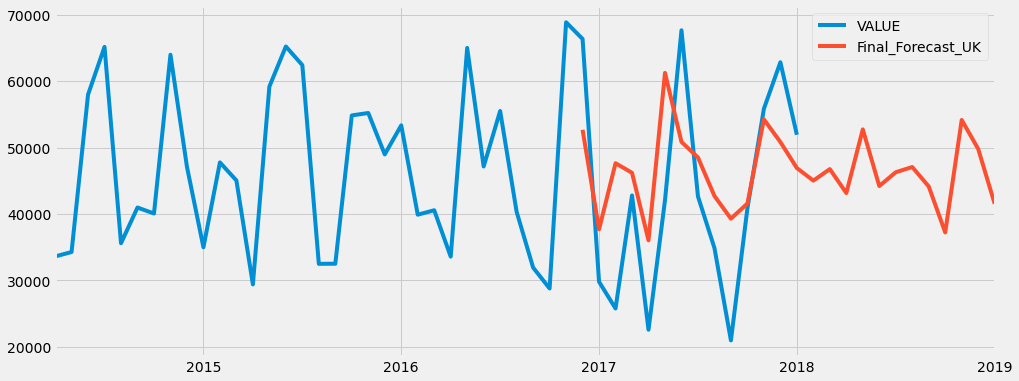

In [181]:
Final_model_UK=ARIMA((2,0,1),(0,0,2,12)).fit(train_UK)
Final_Forecast_UK=pd.Series(Final_model_UK.predict(26)).rename('Final_Forecast_UK')
Final_Forecast_UK_DF=pd.concat([UK,Final_Forecast_UK],axis=1)
Final_Forecast_UK_DF.plot(figsize=(15,6))

# Conclusion #

 Overall, our forecasts align with the true values very well.
 
 So, we can go ahead with SARIMA model.
    
 As per the Prediction for next 12 months state wise graphs we can say that ABC Manufacturing Company is good to Growth in all states